<a href="https://colab.research.google.com/github/hembasnet/Heart-Disease-Prediction-using-Logistic-Regression/blob/main/Heart_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

**Data loading **

In [ ]:
disease_df = pd.read_csv('/content/framingham.csv')
disease_df = disease_df.drop(columns=['education']).dropna()
disease_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
disease_df.dropna(axis = 0, inplace = True)
disease_df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
print(disease_df.TenYearCHD.value_counts())

TenYearCHD
0    3179
1     572
Name: count, dtype: int64


**Splitting the Dataset into Test and Train Sets**

In [ ]:
x = np.asarray(disease_df[['age', 'male', 'cigsPerDay', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])
x = preprocessing.StandardScaler().fit(x).transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2625, 5) (2625,)
(1126, 5) (1126,)


**EDA**

/tmp/ipython-input-2987196322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'TenYearCHD', data = disease_df, palette="BuGn_r")


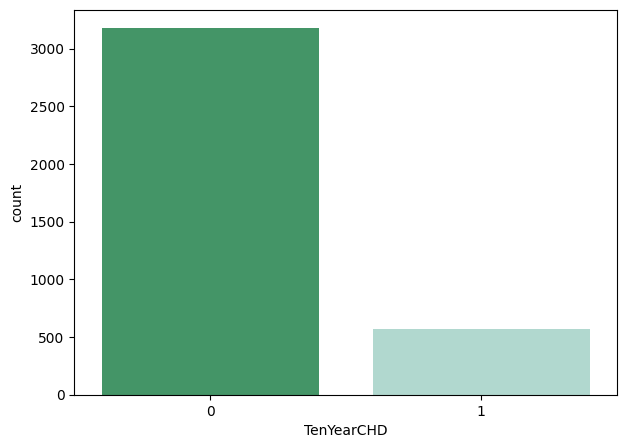

In [ ]:
plt.figure(figsize = (7, 5))
sns.countplot(x = 'TenYearCHD', data = disease_df, palette="BuGn_r")
plt.show()

**Counting number of patients affected by CHD **

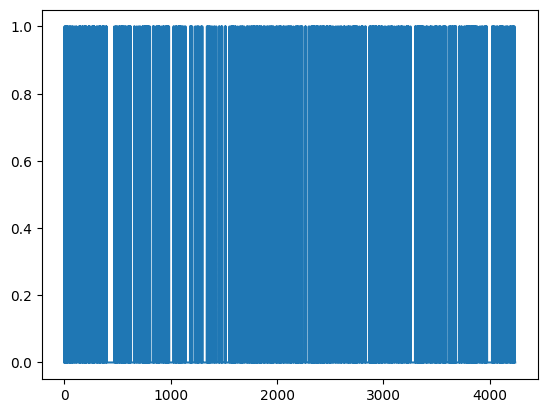

In [ ]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)


** Fitting Logistic Regression Model for Heart Disease Prediction**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()

logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('accuracy of the model is = ', accuracy_score(y_test, y_pred))

accuracy of the model is =  0.8481349911190054


**Plotting Confusion Matrix**

The details for confusion matrix is =
[[941  10]
 [161  14]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.58      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.72      0.53      0.53      1126
weighted avg       0.81      0.85      0.80      1126



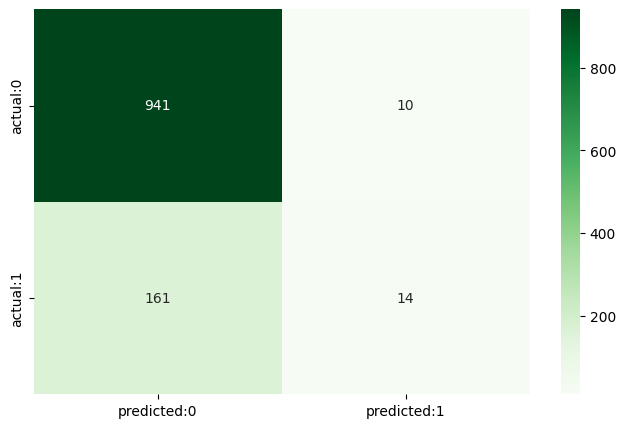

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
print('The details for confusion matrix is =')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
confg_matrix = pd.DataFrame(data = confusion_matrix(y_test, y_pred), columns = ['predicted:0', 'predicted:1'], index = ['actual:0', 'actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(confg_matrix, annot = True, fmt= 'd', cmap = 'Greens')
plt.show()

the model performs well at predicting no heart disease (class 0) but poorly predicts heart disease (class 1) result in an imbalanced classification performance.